In [17]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score


In [18]:
df = pd.read_csv("/kaggle/input/autompg-dataset/auto-mpg.csv")

df.replace('?', np.nan, inplace=True)
df['horsepower'] = df['horsepower'].astype(float)


In [19]:
X = df[['horsepower']]
y = df['mpg']


In [20]:
X = X.fillna(X.mean())
X.isnull().sum()


horsepower    0
dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


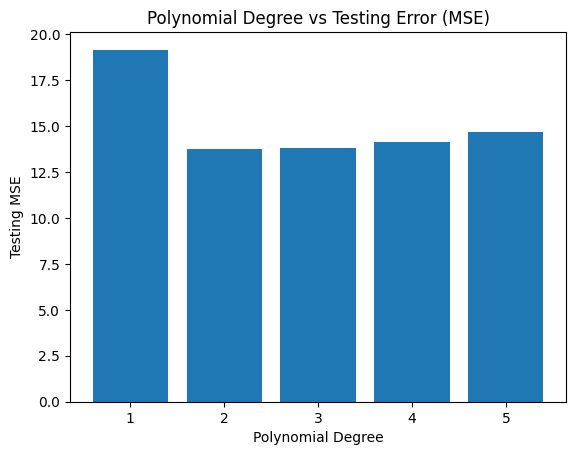

In [31]:
plt.figure()
plt.bar([str(d) for d in degrees_full], test_mse)
plt.xlabel("Polynomial Degree")
plt.ylabel("Testing MSE")
plt.title("Polynomial Degree vs Testing Error (MSE)")
plt.show()


In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
degrees = [2, 3, 4]
results = {}

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_pred = model.predict(X_test_poly)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[d] = {'MSE': mse, 'RMSE': rmse, 'R2': r2}


In [24]:
for d, metrics in results.items():
    print(f"Degree {d}:")
    print("MSE:", metrics['MSE'])
    print("RMSE:", metrics['RMSE'])
    print("R2 Score:", metrics['R2'])
    print()


Degree 2:
MSE: 13.760855128148345
RMSE: 3.709562659957147
R2 Score: 0.7440623896917427

Degree 3:
MSE: 13.813374257349995
RMSE: 3.716634802795399
R2 Score: 0.7430855884466044

Degree 4:
MSE: 14.118024022829639
RMSE: 3.757395909779756
R2 Score: 0.7374194192854788



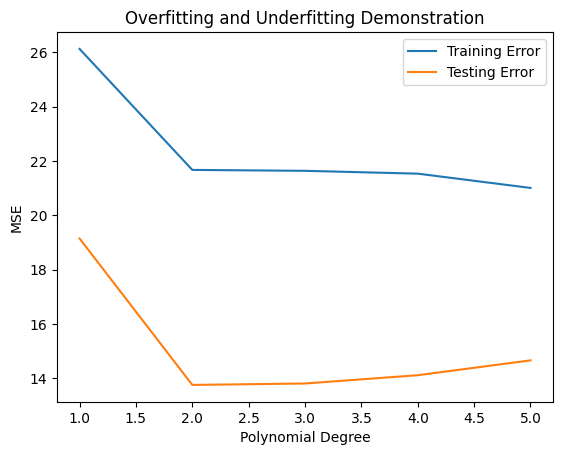

In [29]:
from sklearn.metrics import mean_squared_error

degrees_full = [1, 2, 3, 4, 5]
train_mse = []
test_mse = []

for d in degrees_full:
    poly = PolynomialFeatures(degree=d)
    
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    train_pred = model.predict(X_train_poly)
    test_pred = model.predict(X_test_poly)
    
    train_mse.append(mean_squared_error(y_train, train_pred))
    test_mse.append(mean_squared_error(y_test, test_pred))

plt.figure()
plt.plot(degrees_full, train_mse, label="Training Error")
plt.plot(degrees_full, test_mse, label="Testing Error")
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.title("Overfitting and Underfitting Demonstration")
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


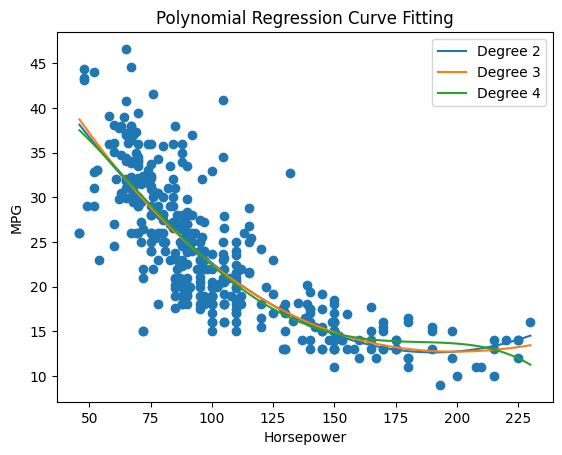

In [25]:
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_scaled = scaler.transform(X_range)

plt.figure()

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X_train_scaled)
    
    model = LinearRegression()
    model.fit(X_poly, y_train)
    
    X_range_poly = poly.transform(X_range_scaled)
    y_range_pred = model.predict(X_range_poly)
    
    plt.plot(X_range, y_range_pred, label=f"Degree {d}")

plt.scatter(X, y)
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Polynomial Regression Curve Fitting")
plt.legend()
plt.show()


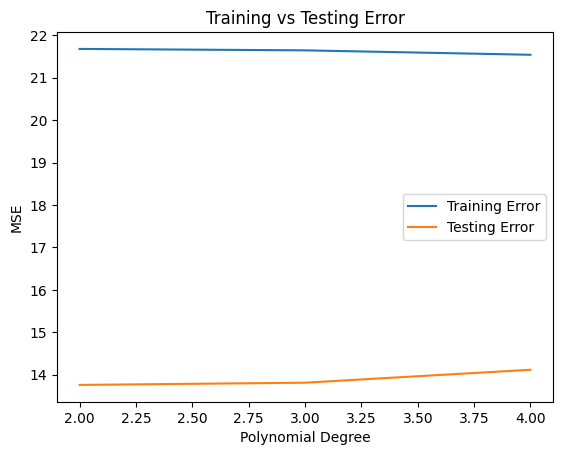

In [26]:
train_errors = []
test_errors = []

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    train_pred = model.predict(X_train_poly)
    test_pred = model.predict(X_test_poly)
    
    train_errors.append(mean_squared_error(y_train, train_pred))
    test_errors.append(mean_squared_error(y_test, test_pred))

plt.figure()
plt.plot(degrees, train_errors, label="Training Error")
plt.plot(degrees, test_errors, label="Testing Error")
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.title("Training vs Testing Error")
plt.legend()
plt.show()


In [27]:
print("Low degree → Underfitting")
print("High degree → Overfitting")
print("Balanced train & test error → Best model")


Low degree → Underfitting
High degree → Overfitting
Balanced train & test error → Best model


In [28]:
poly = PolynomialFeatures(degree=4)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_poly, y_train)

ridge_pred = ridge.predict(X_test_poly)

print("Ridge Regression Performance:")
print("MSE:", mean_squared_error(y_test, ridge_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, ridge_pred)))
print("R2 Score:", r2_score(y_test, ridge_pred))


Ridge Regression Performance:
MSE: 14.015801229840454
RMSE: 3.743768319466424
R2 Score: 0.7393206570438192
